In [8]:
using GynC: readsamples, dataframe, data, hzobj
ss=readsamples("../data/0911")

LoadError: LoadError: TypeError: deserialize: in typeassert, expected Module, got Type{Any}
while loading In[8], in expression starting on line 2

In [4]:
?GynC.dataframe

No documentation found.

`GynC.dataframe` is a `Function`.

```
# 1 method for generic function "dataframe":
dataframe(ss::Array{GynC.Sampling,1}) at /home/numerik/bzfsikor/.julia/v0.5/GynC/src/utils.jl:63
```


In [5]:
ss

LoadError: LoadError: UndefVarError: ss not defined
while loading In[5], in expression starting on line 1

In [2]:
datas = [data(s) for s in ss];
x=vcat([s.samples[1:1000:20000,:] for s in ss]...)

900x116 Array{Float64,2}:
  7309.9    7309.9   192.2     2.371    …  3.3169e-5   2.9879e-5   28.0   
  8878.67   6354.57  226.312   2.12303     3.89578e-5  1.80161e-5  27.6444
  8219.94   6018.49  216.786   1.4548      3.5427e-5   2.57119e-5  28.5116
 13686.1    6790.4   324.427   2.80569     4.39839e-5  2.14427e-5  27.3692
 16824.6    7741.02  459.296   2.82709     3.49722e-5  2.48237e-5  26.9132
 13061.5    6887.27  326.628   4.14603  …  2.58883e-5  1.85626e-5  28.684 
 10847.2    6249.34  375.124   2.51081     3.45316e-5  1.98175e-5  28.7088
 13139.2    9107.13  324.435   4.16463     3.39051e-5  2.89039e-5  28.5406
 10280.7   10440.7   301.69    3.13941     4.61279e-5  2.88888e-5  29.8739
 15636.6   14270.3   325.84    5.60388     4.92687e-5  2.86894e-5  28.1297
 16834.9   16910.5   464.457   3.29516  …  4.56624e-5  1.99933e-5  27.1589
  9119.81  14516.1   601.791   3.25238     4.79829e-5  1.39903e-5  28.8607
 10519.9   10695.1   341.461   4.10406     2.6239e-5   2.52047e-5  28.5704

In [3]:
@show K = size(x, 1)
@show M = length(datas)
@time o = hzobj(x,datas)

using BenchmarkTools
@benchmark o(rand(K))

K = size(x,1) = 900
M = length(datas) = 45



[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 1.72979e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 1.04051e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 1.04051e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 3.9913e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 3.05689e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 3.05689e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 3.05689e-17 are such that t + h = t on the next step. The solver will continue an

 32.037364 seconds (216.93 M allocations: 11.220 GB, 16.30% gc time)


BenchmarkTools.Trial: 
  samples:          1469
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%
  memory estimate:  28.97 kb
  allocs estimate:  11
  minimum time:     3.34 ms (0.00% GC)
  median time:      3.37 ms (0.00% GC)
  mean time:        3.39 ms (0.18% GC)
  maximum time:     12.52 ms (69.93% GC)

In [4]:
Profile.clear()
@profile o = hzobj(x,datas)
Profile.print()


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 1.72979e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 1.04051e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 1.04051e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 3.9913e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 3.05689e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 3.05689e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 26.6578 and h = 3.05689e-17 are such that t + h = t on the next step. The solver will continue an

1875  ...undials/src/simple.jl; cvodefun; line: 78
 1529 .../GynC/src/gyncycle.jl; anonymous; line: 8
  3   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 42
  77  .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 81
  3   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 82
  73  .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 85
  61  .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 86
  1   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 87
  4   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 90
  1   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 93
  1   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 96
  1   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 99
  219 .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 102
  54  .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 103
  1   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 110
  2   .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 116
  123 .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 119
  94  .../GynC/src/gyncycle.jl; gyncycle_rhs!; line: 

K|M|precalc (s)|eval (ms)
---|---|---|---
90|45|1.75|0.05
900|45|32|3.69

## Optimization

In [28]:
# given a function f: R^dim -> R, return a function 
# g(x,g) which returns f(x) and stores f'(x) in g
# the format u
function gradify(f, dim)
    grad = ForwardDiff.GradientResult(rand(dim))
    function gradifiedf(w,g)
        ForwardDiff.gradient!(grad, f, w)
        if length(g) > 0
            g[:] = ForwardDiff.gradient(grad)
        end
        ForwardDiff.value(grad)
    end
end

obj2 = gradify(w->o(w/sum(w)), K)

using NLopt

ln = [:GN_ISRES, :LN_COBYLA, :LN_BOBYQA, :LN_NEWUOA_BOUND, :LN_PRAXIS, :LN_NELDERMEAD, :LN_SBPLX]
ld = [:LD_LBFGS, :LD_MMA, :LD_SLSQP]
opt = Opt(ln[1], K)

lower_bounds!(opt, zeros(K))
upper_bounds!(opt, ones(K))

#equality_constraint!(opt, gradify(w->sum(w)-1, K))

max_objective!(opt, obj2)
#max_objective!(opt, (w,g) -> o(w) - ((sum(w)-1)*10000)^20)


maxeval!(opt, 10)

w=ones(K)/K

for i=1:2
  @time v,w = optimize!(opt, w) 
  @show v
end
#@show sum(w)
v

 44.480124 seconds (14.15 k allocations: 275.877 MB, 0.23% gc time)
v = 0.16976308716301375
 44.924617 seconds (13.14 k allocations: 275.822 MB, 0.21% gc time)
v = 0.17015640156691667


0.17015640156691667

In [30]:
w

900-element Array{Float64,1}:
 0.00319571
 0.0711636 
 0.789389  
 0.487174  
 0.00768181
 0.392783  
 0.480511  
 0.774093  
 0.86932   
 0.214873  
 0.00287461
 0.883961  
 0.684087  
 ⋮         
 0.747507  
 0.940556  
 0.795559  
 0.860478  
 0.822997  
 0.998803  
 0.924359  
 0.486064  
 0.465207  
 0.564916  
 0.394138  
 0.761875  


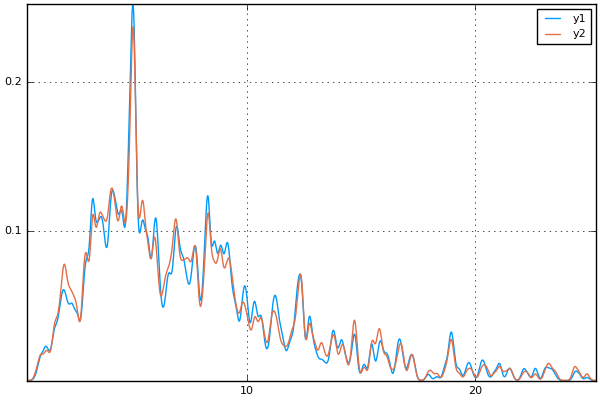

In [29]:
using KernelDensity
using Plots
k=   kde(x[:,8], weights=w, bandwidth=0.1)
kuni=kde(x[:,8], bandwidth=0.1)
plot()
for k in [k, kuni]
    plot!(k.x, k.density)
end
plot!()